In [367]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pickle

In [368]:
# Loading the data set
ins = pd.read_csv("data/insurance.csv")
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [369]:
# Converting the smoker column into numerical format
ins.dropna(subset=['smoker'], inplace=True)     # The null value was dropped.
ins['smoker'] = ins['smoker'].map({'yes': 1, 'no': 0})
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [370]:
# Converting the sex column into numerical format
ins['sex'] = ins['sex'].map({'male': 0, 'female': 1})
ins

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [371]:
# Dropping the 'region' column
ins.drop('region', axis=1, inplace=True)

In [372]:
# Getting the X and Y variables
X = ins['age']
y = ins['charges']

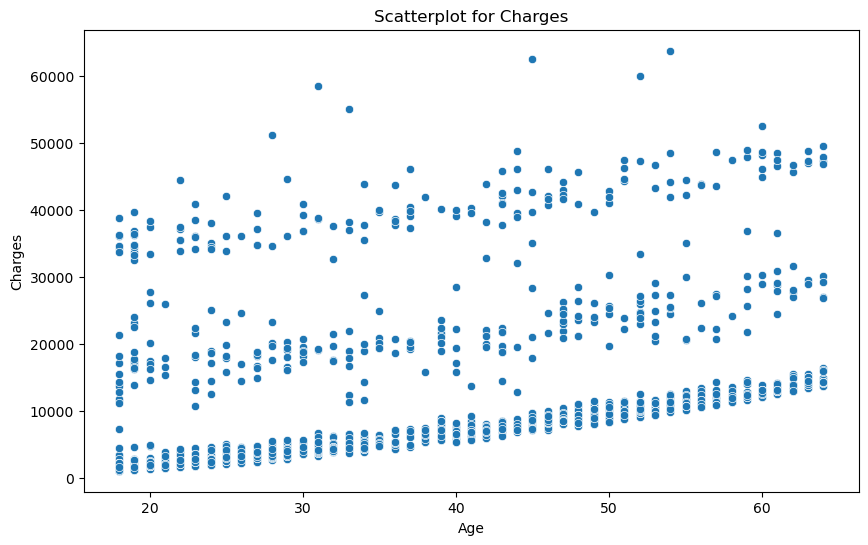

In [373]:
# Plotting scatterplot for x and y variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ins, x='age', y='charges')
plt.title('Scatterplot for Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()
plt.close()

In [374]:
# Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [375]:
# # Creating and Training the model
model = RandomForestRegressor(random_state=42)

# Training the model
model.fit(x_train, y_train)

# Save the model to a pickle file
with open('ins_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [376]:
# Create the predictions
predictions = model.predict(x_test)
predictions

array([16061.75254839, 11645.98621748, 24030.61773282, 13920.9800595 ,
       10096.23288465, 11213.00562803, 10096.23288465, 24030.61773282,
        8459.23733921, 13642.74038568, 16549.03096504, 10312.4491427 ,
        8995.29683852, 13920.9800595 , 21621.49359959, 16454.14409618,
       13642.74038568, 16454.14409618, 13920.9800595 , 18278.04215692,
       11887.01081379, 18278.04215692, 10096.23288465, 11576.23390802,
       15245.46753773, 17460.0800285 , 21621.49359959, 11691.55361973,
       16454.14409618,  7940.27588273, 10056.92850789, 15488.04960726,
        4463.77516804, 16549.03096504,  6622.12163526, 16061.75254839,
        4463.77516804, 18278.04215692, 16825.81969092, 11645.98621748,
       10096.23288465, 11576.23390802, 15686.81251266, 20440.7488554 ,
       11866.98189364, 20440.7488554 ,  4463.77516804, 11887.01081379,
       18278.04215692,  8852.52490745, 16789.59238388,  7940.27588273,
       10056.92850789,  7940.27588273, 15686.81251266, 15245.46753773,
      

In [377]:
#Checking the precision, recall and f1-score
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 9187.747610810737
